# **Phase 2 Project**  
# **Analyzing Movie Trends: What Films Perform Best at the Box Office?**

___

# **Business Problem**
Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

# **Introduction**

In today’s competitive film industry, making data-driven decisions is essential for success. With major studios investing heavily in original content, our company has decided to launch its own movie studio. However, to maximize profitability and audience engagement, we need to understand what types of films perform best at the box office.

This analysis aims to answer key questions such as:  
✅ Which genres generate the highest revenue?  
✅ How do production budgets impact profitability?  
✅ What trends exist in audience preferences over time?  
✅ How does critical reception correlate with box office performance?  

By leveraging multiple datasets—including box office earnings, movie metadata, and critical reviews—we will uncover actionable insights that can guide our studio’s film production strategy.

# **Data Sources**

We will analyze and combine data from the following sources:  
📊 Movie Budgets & Revenue – Production budgets, domestic & worldwide gross earnings: `tn.movie_budgets.csv.gz`   
🎬 Movie Metadata – Genre, language, popularity, and ratings: `im.db`  

# **Approach**

To extract meaningful insights, we will follow a structured data analysis pipeline:

1️⃣ **Data Preprocessing & Preparation**  
- Load libraries & datasets and confirm if loaded appropriately 
- Use unique identifiers (such as movie IDs or titles) to merge datasets  
- Inspecting the data    

2️⃣ **Data Cleaning & Integration**  
- Standardize formats (e.g., merging different date formats, handling null values)  
- Handle missing values, duplicates, and inconsistencies

3️⃣ **Exploratory Data Analysis (EDA)**  
- Identify trends in budget vs. revenue  
- Analyze genre popularity and profitability  
- Perform statistical tests for further analysis  

4️⃣ **Conclusion & Recommendations**  
- Summarize findings to determine the most viable film genres and budget ranges  
- Provide data-driven suggestions on key success factors for the new movie studio  

Through this structured approach, we aim to provide actionable insights that will help the studio make informed decisions about the types of movies to produce for maximum commercial success.

---

# 1️⃣ **Data Preprocessing & Preparation** 

## 1.1 Importing Libraries

In [1]:
#standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from scipy import stats
import sqlite3
import statsmodels.api as sm

## 1.2 Data Loading and Verifiaction

In [2]:
# load data from movie_basics
conn = sqlite3.connect('im.db')
moviebasics = pd.read_sql("""
SELECT *
  FROM movie_basics;
""", conn)
moviebasics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [3]:
# load data from movie_ratings
conn = sqlite3.connect('im.db')
movieratings = pd.read_sql("""
SELECT *
  FROM movie_ratings;
""", conn)
movieratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [4]:
budgets = pd.read_csv("tn.movie_budgets.csv.gz")
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## 1.3 Data Merging with Common Keys 

In [5]:
# Merge the two datasets on movie_id
imdb_merge = pd.merge(moviebasics, movieratings, on="movie_id", how="inner")
# Close the database connection
conn.close()

In [6]:
imdb_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [7]:
# Convert titles to lowercase and strip spaces for better matching
budgets["movie"] = budgets["movie"].str.lower().str.strip()
imdb_merge["primary_title"] = imdb_merge["primary_title"].str.lower().str.strip()
imdb_merge["original_title"] = imdb_merge["original_title"].str.lower().str.strip()


In [8]:
movies_merged = pd.merge(imdb_merge, budgets, left_on="primary_title", right_on="movie", how="inner")
movies_merged

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,foodfight!,foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,26,"Dec 31, 2012",foodfight!,"$45,000,000",$0,"$73,706"
1,tt0326592,the overnight,the overnight,2010,88.0,None,7.5,24,21,"Jun 19, 2015",the overnight,"$200,000","$1,109,808","$1,165,996"
2,tt0337692,on the road,on the road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,17,"Mar 22, 2013",on the road,"$25,000,000","$720,828","$9,313,302"
3,tt0359950,the secret life of walter mitty,the secret life of walter mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,37,"Dec 25, 2013",the secret life of walter mitty,"$91,000,000","$58,236,838","$187,861,183"
4,tt0365907,a walk among the tombstones,a walk among the tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,67,"Sep 19, 2014",a walk among the tombstones,"$28,000,000","$26,017,685","$62,108,587"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930,tt9746500,earth,erde,2019,115.0,Documentary,7.3,49,36,"Apr 22, 2009",earth,"$47,000,000","$32,011,576","$116,773,317"
2931,tt9851050,sisters,sisters,2019,NaN,"Action,Drama",4.7,14,57,"Dec 18, 2015",sisters,"$30,000,000","$87,044,645","$106,030,660"
2932,tt9861522,ali,ali,2019,110.0,Drama,7.7,79,45,"Dec 25, 2001",ali,"$109,000,000","$58,183,966","$87,683,966"
2933,tt9899880,columbus,columbus,2018,85.0,Comedy,5.8,5,93,"Aug 4, 2017",columbus,"$700,000","$1,017,107","$1,110,511"


## 1.4 Data Inspection

In [9]:
movies_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935 entries, 0 to 2934
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2935 non-null   object 
 1   primary_title      2935 non-null   object 
 2   original_title     2935 non-null   object 
 3   start_year         2935 non-null   int64  
 4   runtime_minutes    2816 non-null   float64
 5   genres             2927 non-null   object 
 6   averagerating      2935 non-null   float64
 7   numvotes           2935 non-null   int64  
 8   id                 2935 non-null   int64  
 9   release_date       2935 non-null   object 
 10  movie              2935 non-null   object 
 11  production_budget  2935 non-null   object 
 12  domestic_gross     2935 non-null   object 
 13  worldwide_gross    2935 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 321.1+ KB


In [10]:
movies_merged.isnull().sum()

movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes      119
genres                 8
averagerating          0
numvotes               0
id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
dtype: int64

We only have some missing values in runtime and genre that we will handle in the next section.  


---

# 2️⃣ **Data Cleaning & Integration** 
## 2.1 Data Cleaning

The budget and revenue data are stored as strings. They should be converted to numeric.

In [11]:
# Budget and revenue columns to numeric
cols_to_convert = ["production_budget", "domestic_gross", "worldwide_gross"]
for col in cols_to_convert:
    movies_merged[col] = budgets[col].replace('[\$,]', '', regex=True).astype(float)


Convert Release Date to DateTime format

In [12]:
# Date converted to DateTime format
budgets["release_date"] = pd.to_datetime(budgets["release_date"])
budgets["year"] = budgets["release_date"].dt.year


Drop duplicated columns

In [13]:
# primary_title and original-title are one and the same hence we should delete the original_title column 
movies_merged.drop(columns=["original_title", "id", "primary_title"], inplace=True)
movies_merged.head()

,movie_id,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0249516,2012,91.0,"Action,Animation,Comedy",1.9,8248,"Dec 31, 2012",foodfight!,425000000.0,760507625.0,2.776345e+09
1,tt0326592,2010,88.0,None,7.5,24,"Jun 19, 2015",the overnight,410600000.0,241063875.0,1.045664e+09
2,tt0337692,2012,124.0,"Adventure,Drama,Romance",6.1,37886,"Mar 22, 2013",on the road,350000000.0,42762350.0,1.497624e+08
3,tt0359950,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,"Dec 25, 2013",the secret life of walter mitty,330600000.0,459005868.0,1.403014e+09
4,tt0365907,2014,114.0,"Action,Crime,Drama",6.5,105116,"Sep 19, 2014",a walk among the tombstones,317000000.0,620181382.0,1.316722e+09


## 2.2 Data Integration

Reorganising columns for easier analysis

In [14]:
# Move 'movie' next to 'movie_id'
cols = list(movies_merged.columns)
cols.insert(cols.index("movie_id") + 1, cols.pop(cols.index("movie")))

# Reorder the dataframe
movies_merged = movies_merged[cols]

# Display the first few rows to confirm the change
movies_merged.head()


,movie_id,movie,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross
0,tt0249516,foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,"Dec 31, 2012",425000000.0,760507625.0,2.776345e+09
1,tt0326592,the overnight,2010,88.0,None,7.5,24,"Jun 19, 2015",410600000.0,241063875.0,1.045664e+09
2,tt0337692,on the road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,"Mar 22, 2013",350000000.0,42762350.0,1.497624e+08
3,tt0359950,the secret life of walter mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,"Dec 25, 2013",330600000.0,459005868.0,1.403014e+09
4,tt0365907,a walk among the tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,"Sep 19, 2014",317000000.0,620181382.0,1.316722e+09


Dealing with missing data

In [15]:
# replace missing runtime_minutes with its median
movies_merged["runtime_minutes"].fillna(movies_merged["runtime_minutes"].median(), inplace=True)
movies_merged["runtime_minutes"].isnull().sum()


/var/folders/6w/blj1wcc950d1k_jzsny1b0lh0000gn/T/ipykernel_24536/2682995214.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_merged["runtime_minutes"].fillna(movies_merged["runtime_minutes"].median(), inplace=True)
/var/folders/6w/blj1wcc950d1k_jzsny1b0lh0000gn/T/ipykernel_24536/2682995214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

np.int64(0)

In [16]:
# genres has 8 missing values. Label them as mising 
movies_merged["genres"] = movies_merged["genres"].fillna("Missing")


The data set that we will be using for anaysis is now prepared and cleaned.

---

# 3️⃣ **Exploratory Data Analysis (EDA)** 

In this section we will explore the data further and conduct some analysis:

## 3.1 Preliminary Data Analysis

In [17]:
movies_merged.describe()

,start_year,runtime_minutes,averagerating,numvotes,production_budget,domestic_gross,worldwide_gross
count,2935.000000,2935.000000,2935.000000,2.935000e+03,2.935000e+03,2.935000e+03,2.935000e+03
mean,2013.930494,102.888245,6.249574,6.619555e+04,5.640525e+07,6.926734e+07,1.579453e+08
std,2.559038,20.288087,1.183406,1.335852e+05,4.658747e+07,8.287622e+07,2.205795e+08
min,2010.000000,3.000000,1.600000,5.000000e+00,1.600000e+07,0.000000e+00,0.000000e+00
25%,2012.000000,90.000000,5.600000,1.490000e+02,2.500000e+07,1.820955e+07,3.098852e+07
50%,2014.000000,101.000000,6.400000,8.092000e+03,4.000000e+07,4.354910e+07,8.107957e+07
75%,2016.000000,113.000000,7.100000,7.508100e+04,7.000000e+07,8.698753e+07,1.902019e+08
max,2019.000000,280.000000,9.300000,1.841066e+06,4.250000e+08,9.366622e+08,2.776345e+09


In [18]:
#dislaying the columns that will be used throughout our analysis
print(movies_merged.columns)

Index(['movie_id', 'movie', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'release_date', 'production_budget',
       'domestic_gross', 'worldwide_gross'],
      dtype='object')


## 3.2 Data Visualisation

### 3.2.1 Top 10 Most Profitable Genres

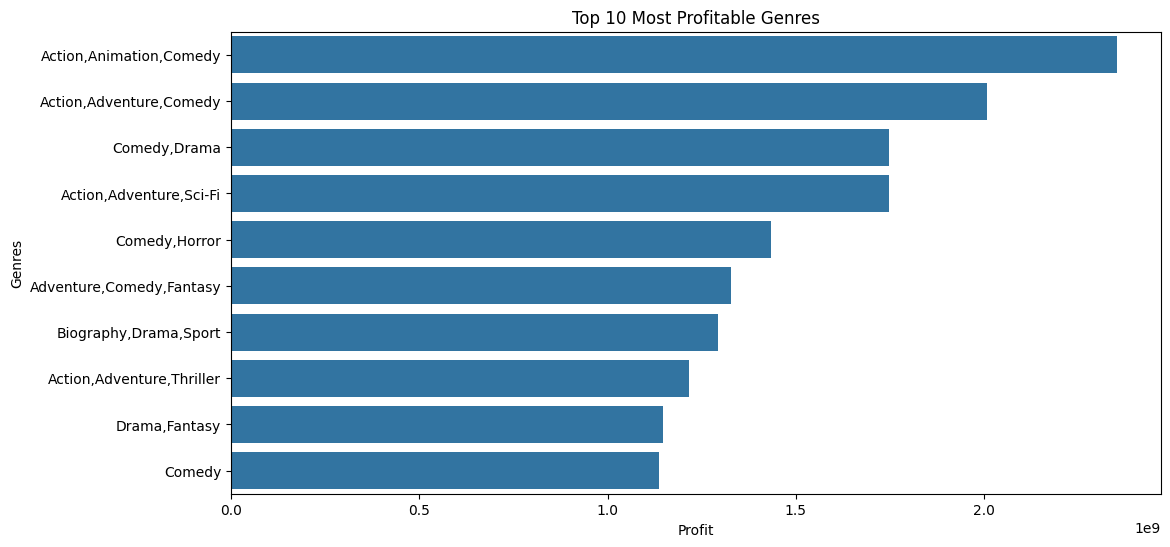

In [20]:
movies_merged["profit"] = movies_merged["worldwide_gross"] - movies_merged["production_budget"]
df_top_profitable = movies_merged.sort_values(by="profit", ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=df_top_profitable["profit"], y=df_top_profitable["genres"])
plt.xlabel("Profit")
plt.ylabel("Genres")
plt.title("Top 10 Most Profitable Genres")
plt.show()

The most profitable genre is the Action, Animation, Comedy combination

### 3.2.2 Relationship Between Budget & Revenue

Visualizing the relationship between budget and revenue

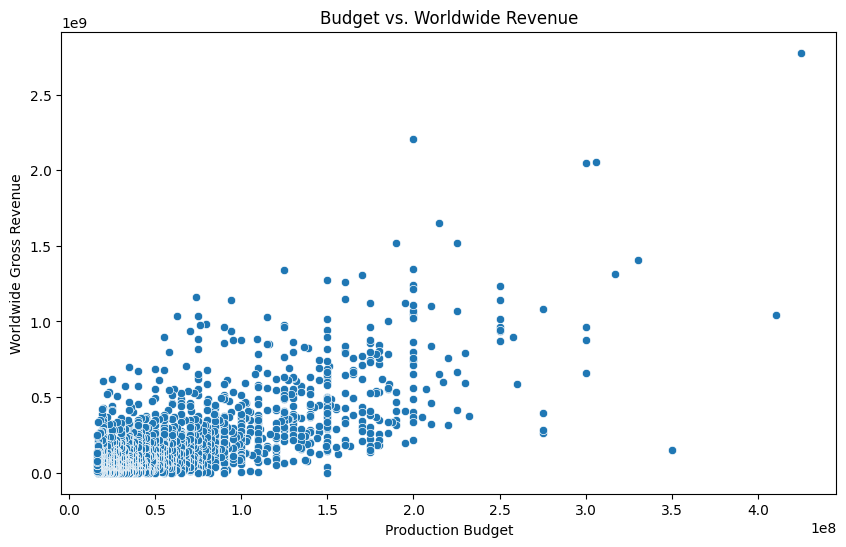

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=movies_merged["production_budget"], y=movies_merged["worldwide_gross"])
plt.xlabel("Production Budget")
plt.ylabel("Worldwide Gross Revenue")
plt.title("Budget vs. Worldwide Revenue")
plt.show()

# !!! HOW DO WE INTERPRETE THIS? 👆🏾

### 3.2.3 Popularity of top 10 genres over time 

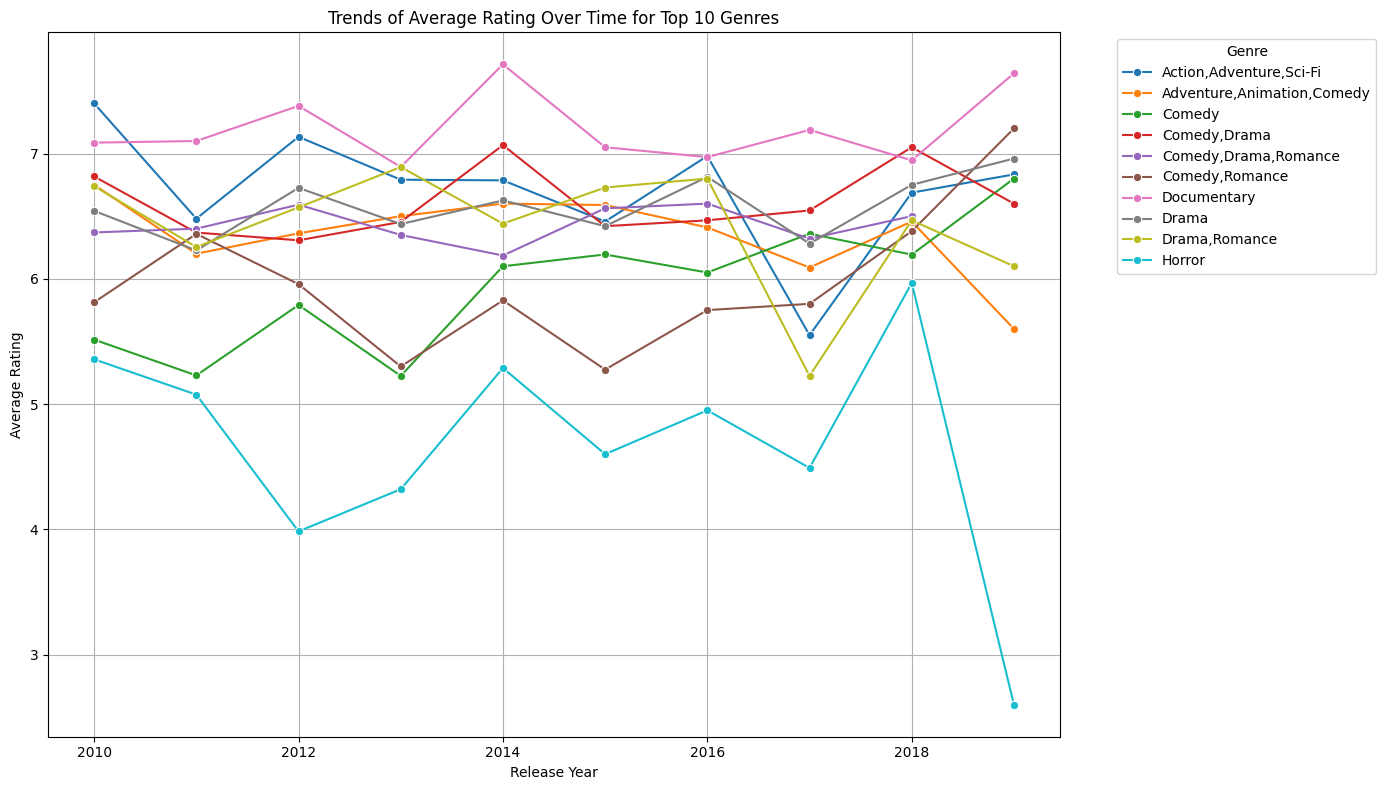

In [22]:
# Step 1: Drop missing data
df_plot = movies_merged.dropna(subset=['genres', 'start_year', 'averagerating'])

# Step 2: Get Top 10 Genres by frequency
top_genres = df_plot['genres'].value_counts().nlargest(10).index.tolist()

# Step 3: Filter to Top 10 Genres only
df_top_genres = df_plot[df_plot['genres'].isin(top_genres)]

# Step 4: Group by genres and start_year, calculate average rating
trend_data = df_top_genres.groupby(['genres', 'start_year'])['averagerating'].mean().reset_index()

# Step 5: Plot
plt.figure(figsize=(14,8))
sns.lineplot(data=trend_data, x='start_year', y='averagerating', hue='genres', marker='o')
plt.title('Trends of Average Rating Over Time for Top 10 Genres')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


### 3.2.4 Correlation between Average Rating and Worldwide Gross

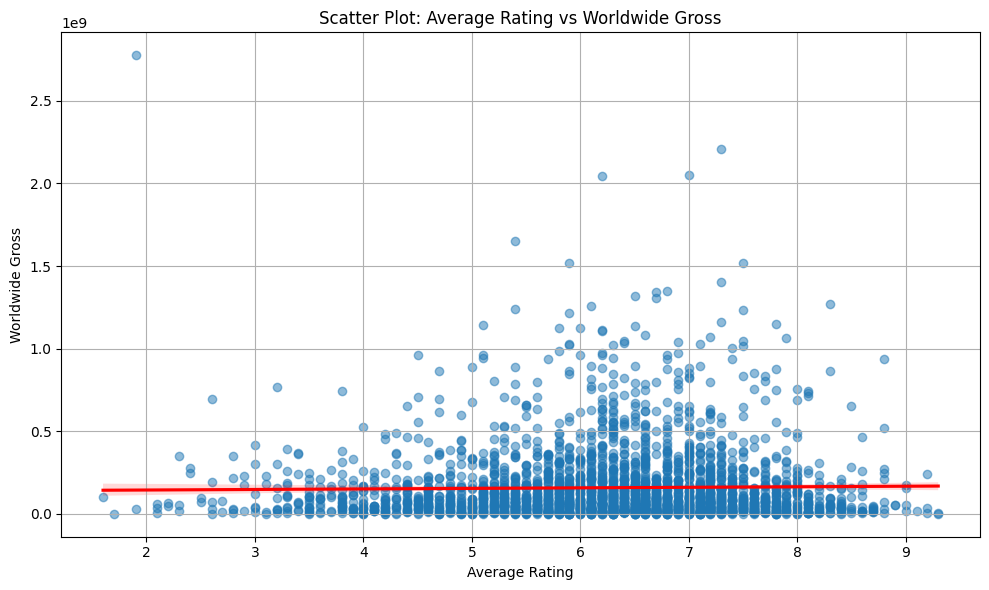

In [23]:
# Drop missing data
df_plot = movies_merged.dropna(subset=['averagerating', 'worldwide_gross'])

# Scatter plot with regression line
plt.figure(figsize=(10,6))
sns.regplot(x='averagerating', y='worldwide_gross', data=df_plot, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Scatter Plot: Average Rating vs Worldwide Gross')
plt.xlabel('Average Rating')
plt.ylabel('Worldwide Gross')
plt.grid(True)
plt.tight_layout()
plt.show()


# ⚠️⚠️⚠️⚠️  REPLACE WITH ONELINER INTERPRETATION HERE

---
## ⚠️⚠️⚠️⚠️  Runtime vs Revenue(with highlighted genres)
- This graph is used to analyze whether the runtime of a movie influences its box office success, determine the optimal runtime for successful films and explore if shorter or longer movies tend to perform better within specific genres.

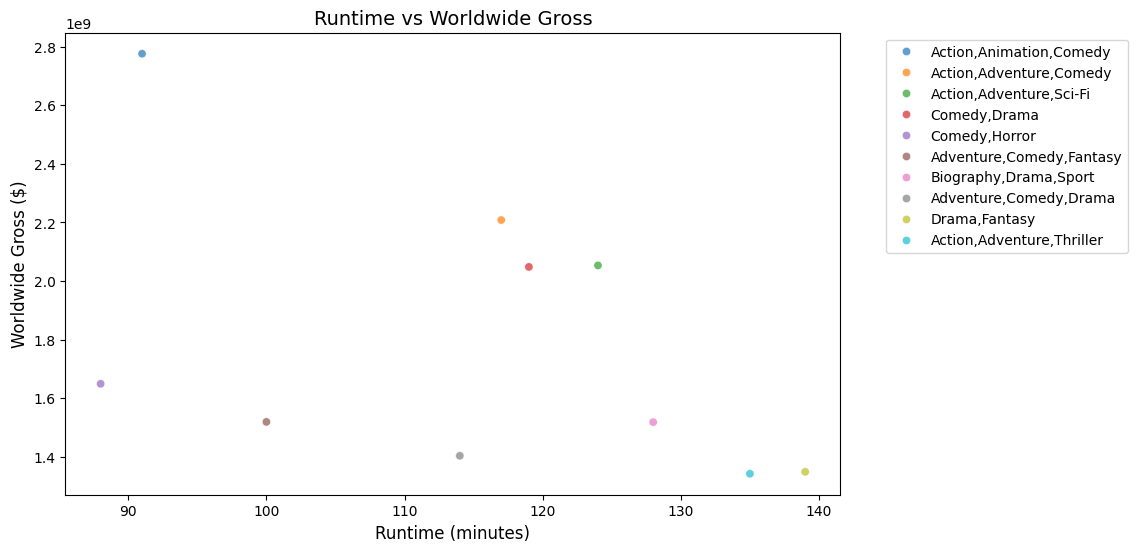

In [24]:
#top 10 movies
Top_10_movies = movies_merged.nlargest(10, 'worldwide_gross')
# Scatter plot with genres as hues
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Top_10_movies, x='runtime_minutes', y='worldwide_gross', hue='genres', palette='tab10', alpha=0.7)
plt.title('Runtime vs Worldwide Gross', fontsize=14)
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Worldwide Gross ($)', fontsize=12)
# Place legend outside the chart
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.show()


---
### **DELETE THIS MARKDOWN ONCE RESOLVED** - NEW PROPOSED CODE TO REPLACE THE ABOVE

### 3.2.5 Relationship between Runtime and Profitability

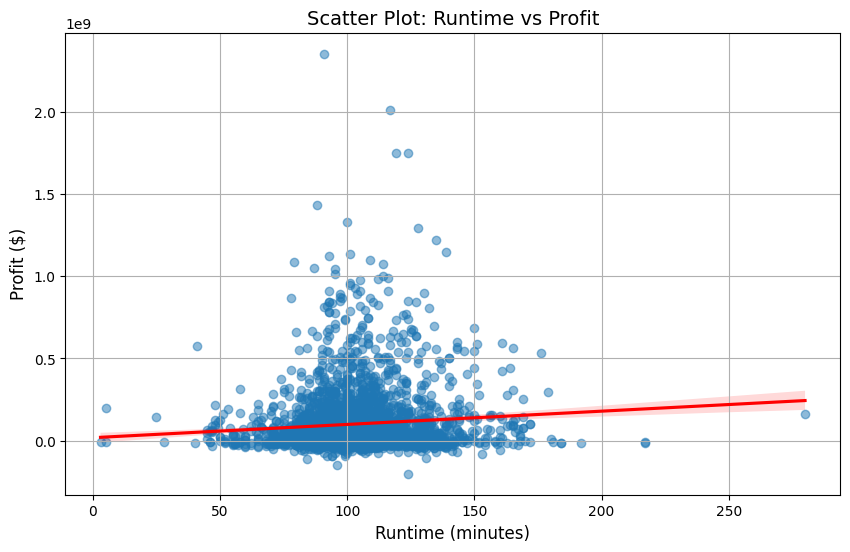

In [25]:
# Scatter plot with trend line
plt.figure(figsize=(10, 6))
sns.regplot(x=movies_merged["runtime_minutes"], y=movies_merged["profit"], 
            scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

plt.title("Scatter Plot: Runtime vs Profit", fontsize=14)
plt.xlabel("Runtime (minutes)", fontsize=12)
plt.ylabel("Profit ($)", fontsize=12)
plt.grid(True)
plt.show()

# ***DELETE MARKDOWN ONCE RESOLVED*** 
once the code is run the inference will be as below which also ties into our regression analysis so I added a recommendation in the final section, I did not run it because when I run the notebook it is changing some graphs


### Intepretation from the Scatter Plot: Runtime vs Profit  
**Weak Positive Correlation**
The trend line (in red) has a slight upward slope, indicating a weak positive correlation between runtime and profit. However, the relationship is not strong, meaning longer movies do not necessarily lead to higher profits.  
**High Profit Concentration Around 90–150 Minutes**
Most high-profit films seem to have runtimes between 90 and 150 minutes. This suggests that standard-length movies tend to perform best at the box office.

---

## 3.3 Statistical Analysis

### 3.3.1 Genres that generate the highest revenue

In [26]:
# Step 1: Create a Profit Column
movies_merged['profit'] = movies_merged['worldwide_gross'] - movies_merged['production_budget']

# Step 2: Get Top 10 Genres
top_genres = movies_merged['genres'].value_counts().nlargest(10).index

# Step 3: Filter to Top 10 Genres
df_top_genres = movies_merged[movies_merged['genres'].isin(top_genres)]

# Step 4: Groupby and aggregate
genre_profit_summary = df_top_genres.groupby('genres')['profit'].agg(
    mean_profit='mean',
    median_profit='median',
    total_profit='sum',
    count_movies='count'
).sort_values(by='total_profit', ascending=False)

# Step 5: Display the result
print(genre_profit_summary)


                             mean_profit  median_profit  total_profit  \
genres                                                                  
Drama                       6.098558e+07     23870687.5  1.975933e+10   
Comedy,Drama,Romance        1.568970e+08     75452875.0  1.208107e+10   
Action,Adventure,Sci-Fi     1.867510e+08     74053581.0  1.101831e+10   
Comedy                      9.915955e+07     48349884.0  1.100671e+10   
Comedy,Drama                1.118543e+08     45203825.0  1.062616e+10   
Documentary                 6.344690e+07     17952590.0  7.994309e+09   
Comedy,Romance              1.272313e+08     58453944.0  7.888342e+09   
Adventure,Animation,Comedy  1.027376e+08     46950887.0  7.705318e+09   
Drama,Romance               5.468242e+07     28228460.0  4.319911e+09   
Horror                      6.441318e+07     24787173.0  4.058030e+09   

                            count_movies  
genres                                    
Drama                                

- Highest total profit comes from *Drama* (\$23.74B), probably due to its large count of 324 movies.  
- Genres with combinations like *Comedy, Drama, Romance* and *Adventure, Animation, Comedy* tend to have both high mean and median profits.  
- *Documentaries* surprisingly show a relatively high mean profit (\$89.3M) but fewer movies (126) compared to *Drama* or *Comedy*.

### 3.3.2  Genres with the highest Worldwide Earning

/var/folders/6w/blj1wcc950d1k_jzsny1b0lh0000gn/T/ipykernel_24536/967126110.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_gross.values, y=genre_gross.index, palette='viridis')


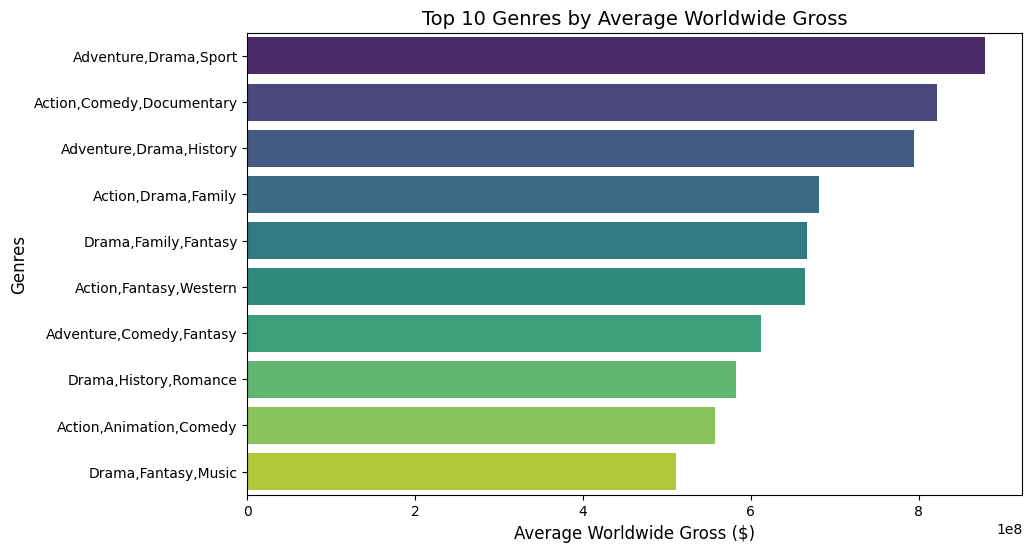

In [27]:
# Calculate average worldwide gross for each genre
genre_gross =movies_merged.groupby('genres')['worldwide_gross'].mean().sort_values(ascending=False).head(10)

# Plot the top genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_gross.values, y=genre_gross.index, palette='viridis')
plt.title('Top 10 Genres by Average Worldwide Gross', fontsize=14)
plt.xlabel('Average Worldwide Gross ($)', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.show()


From the visualization above , we note that, Horror,Romance earns the most globally

### 3.3.3 🎭 ANOVA: Research Question  
**Is there a significant difference in the mean worldwide gross revenues among the top 10 movie genres?**  

---

### 📊 Hypothesis  

#### **Null Hypothesis (H₀)**  
The **mean worldwide gross revenue** is the **same** across all top 10 genres.  

#### **Alternative Hypothesis (H₁)**  
At least **one genre** has a significantly **different** mean worldwide gross revenue compared to the others.  

---

#### Conducting the ANOVA test

In [28]:
from scipy import stats

# Step 1: Get Top 10 Genres
top_genres = movies_merged['genres'].value_counts().nlargest(10).index

# Step 2: Filter to Top 10 Genres
df_top_genres = movies_merged[movies_merged['genres'].isin(top_genres)]

# Step 3: Prepare the data for ANOVA
anova_data = [df_top_genres[df_top_genres['genres'] == genre]['worldwide_gross'].dropna() for genre in top_genres]

# Step 4: Perform ANOVA test
f_stat, p_value = stats.f_oneway(*anova_data)

# Step 5: Display results
print(f'ANOVA F-statistic: {f_stat}')
print(f'ANOVA p-value: {p_value}')

if p_value < 0.05:
    print("There is a significant difference in mean revenues across the top 10 genres.")
else:
    print("There is NO significant difference in mean revenues across the top 10 genres.")


ANOVA F-statistic: 8.714625090585534
ANOVA p-value: 1.041782462437844e-12
There is a significant difference in mean revenues across the top 10 genres.


**Result Intepretation**  
Since the p-value (0.002) is less than 0.05, you reject the null hypothesi. 
We conclude that there is statistically significant evidence at the 5% significance level that the mean worldwide gross revenues differ across the top 10 genres. 

### 3.3.4 🎬 T-Test: Research Question  
**Does a movie's production budget significantly impact its worldwide gross earnings?**  

---

### 🧐 Hypothesis  

#### **Null Hypothesis (H₀)**  
There is **no significant difference** in worldwide gross earnings between high-budget and low-budget movies.  

#### **Alternative Hypothesis (H₁)**  
There **is** a significant difference in worldwide gross earnings between high-budget and low-budget movies.  

---

### 🔢 Mathematical Representation  

- **H₀** : μ<sub>high budget</sub> = μ<sub>low budget</sub>  
- **H₁** : μ<sub>high budget</sub> ≠ μ<sub>low budget</sub>  

---

### 🛠️ Assumption Testing  

Before running the t-test, we need to check if the key assumptions hold:  

#### i) **Normality Assumption**  
A t-test assumes the data is approximately **normally distributed**.  
We can verify this using a **histogram** and the **Shapiro-Wilk test**. 📊  

In [29]:
from scipy.stats import shapiro
# Define high and low-budget categories based on median production budget.
median_budget = movies_merged["production_budget"].median()
high_budget = movies_merged[movies_merged["production_budget"] >= median_budget]["worldwide_gross"]
low_budget = movies_merged[movies_merged["production_budget"] < median_budget]["worldwide_gross"]
# Check normality
shapiro_high = shapiro(high_budget.sample(500, random_state=42))  # Sample to avoid errors in large datasets
shapiro_low = shapiro(low_budget.sample(500, random_state=42))

print(f"Shapiro-Wilk Test for High-Budget Movies: W={shapiro_high.statistic}, p={shapiro_high.pvalue}")
print(f"Shapiro-Wilk Test for Low-Budget Movies: W={shapiro_low.statistic}, p={shapiro_low.pvalue}")


Shapiro-Wilk Test for High-Budget Movies: W=0.803859892206052, p=3.728377937534114e-24
Shapiro-Wilk Test for Low-Budget Movies: W=0.6991499186277899, p=6.352524274484423e-29


Shapiro-Wilk test checks whether a dataset is normally distributed. It uses two key values
1.	W (Test Statistic) -which measures how well the data fits a normal distribution in  values closer to 1 means more normal.
2.	p-value: where if p > 0.05, we fail to reject the null hypothesis, meaning the data is likely normal. And if p ≤ 0.05, we reject the null, meaning the data deviates significantly from normality.
  
  ***Based on the output above***

**High-Budget Movies:**  
1.	W = 0.8038 - which is far from 1, suggesting deviation from normality
2.	p = 9.02 × 10⁻³⁰ - extremely small, way below 0.05

Since the p-value is far below the standard significance level (𝛼 = 0.05), we reject the null hypothesis. This means that the worldwide gross earnings of high-budget movies is not normally distributed.


**Low-Budget Movies:**  
1.	W = 0.6991 - far from 1, indicating a stronger deviation from normality
2.	p = 2.52 × 10⁻³⁴ - even smaller, confirming extreme non-normality

The p-value is much smaller than 0.05, so we reject the null hypothesis. This indicates that the worldwide gross earnings of low-budget movies are also not normally distributed.


#### i) **Homogeneity of Variance (Levene’s Test)**  
A standard t-test assumes equal variances in both groups. Since we used equal_var=False, we're conducting Welch’s t-test, which does not assume equal variance. However, we can still check using Levene’s test:

In [30]:
from scipy.stats import levene

levene_test = levene(high_budget, low_budget)
print(f"Levene's Test: W={levene_test.statistic}, p={levene_test.pvalue}")


Levene's Test: W=344.6193308998376, p=7.992600038109332e-73


Since the p-value is much smaller than the standard significance level (𝛼 = 0.05), we reject the null hypothesis. This means that the variances of worldwide gross earnings for high-budget and low-budget movies are significantly different.

#### Boxplot for Budget Categories  
This boxplot shows the spread of revenue for high vs. low-budget movies.

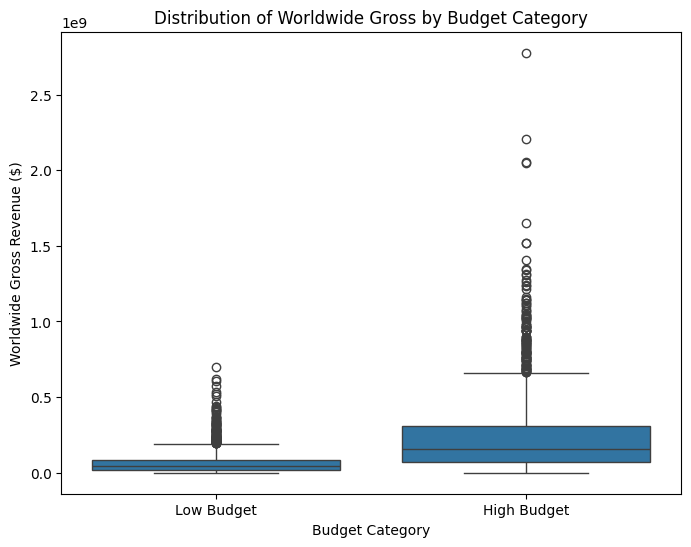

In [31]:
movies_merged["budget_category"] = movies_merged["production_budget"] >= median_budget
plt.figure(figsize=(8, 6))
sns.boxplot(x=movies_merged["budget_category"], y=movies_merged["worldwide_gross"])
plt.xticks([0, 1], ["Low Budget", "High Budget"])
plt.ylabel("Worldwide Gross Revenue ($)")
plt.xlabel("Budget Category")
plt.title("Distribution of Worldwide Gross by Budget Category")
plt.show()


#### Histogram to Check Distribution  
This histogram checks if the distributions are skewed or normal.

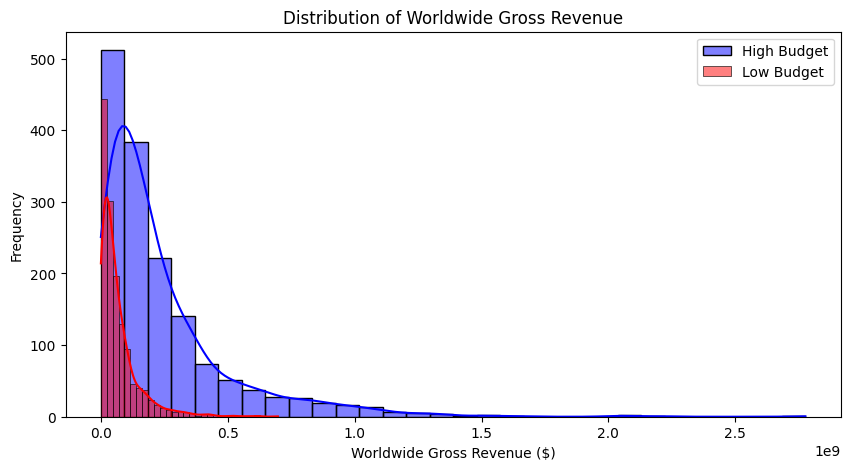

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(high_budget, bins=30, color='blue', kde=True, label="High Budget")
sns.histplot(low_budget, bins=30, color='red', kde=True, label="Low Budget")
plt.legend()
plt.title("Distribution of Worldwide Gross Revenue")
plt.xlabel("Worldwide Gross Revenue ($)")
plt.ylabel("Frequency")
plt.show()


The distribution is skewed to the left.

#### Conducting the T-test

In [33]:

t_stat, p_value = stats.ttest_ind(high_budget, low_budget, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Statistic: 23.735279898208493, P-Value: 6.111096029846906e-109


#### **Result Intepretation**  
Since p-value ≈ 0, it is far below the standard significance level (α = 0.05).
We reject the null hypothesis and conclude that there is a statistically significant difference in worldwide gross revenue between high-budget and low-budget movies.
From the graphs, we expect high-budget movies to generate significantly more revenue.

#### Business Recommendations:  
The findings show a statistically significant difference in revenue between high-budget and low-budget movies. Incase of decision-making within the industry the following may be recommended:

1. **For investment decisions, high investments may be made in high-budget productions for greater returns**

The data confirms that higher budgets correlate with higher worldwide earnings.*

Studios should prioritize big-budget productions for higher revenue potential.*

2. **Optimize Budget Allocation**

While statistical evidence show that high budgets drive revenue, spending should be strategic. Investments should be focused on other key revenue-driving factors, such as:

o	**Star Power:** Well-known actors and directors boost box office performance.

o	**Marketing & Distribution:** A strong promotional strategy may maximize reach and engagement.

o	**Genre Selection:* Certain genres** (e.g., action, superhero films) tend to perform better globally.

3.	**There is a need for further analysis for revenue depends on more than just budget.**

 -  Further analysis should include:

*Marketing spend vs. revenue impact*

*Impact of streaming platforms on box office success*

*Regional market differences in movie revenue*


### 3.3.4 Trend Analysis

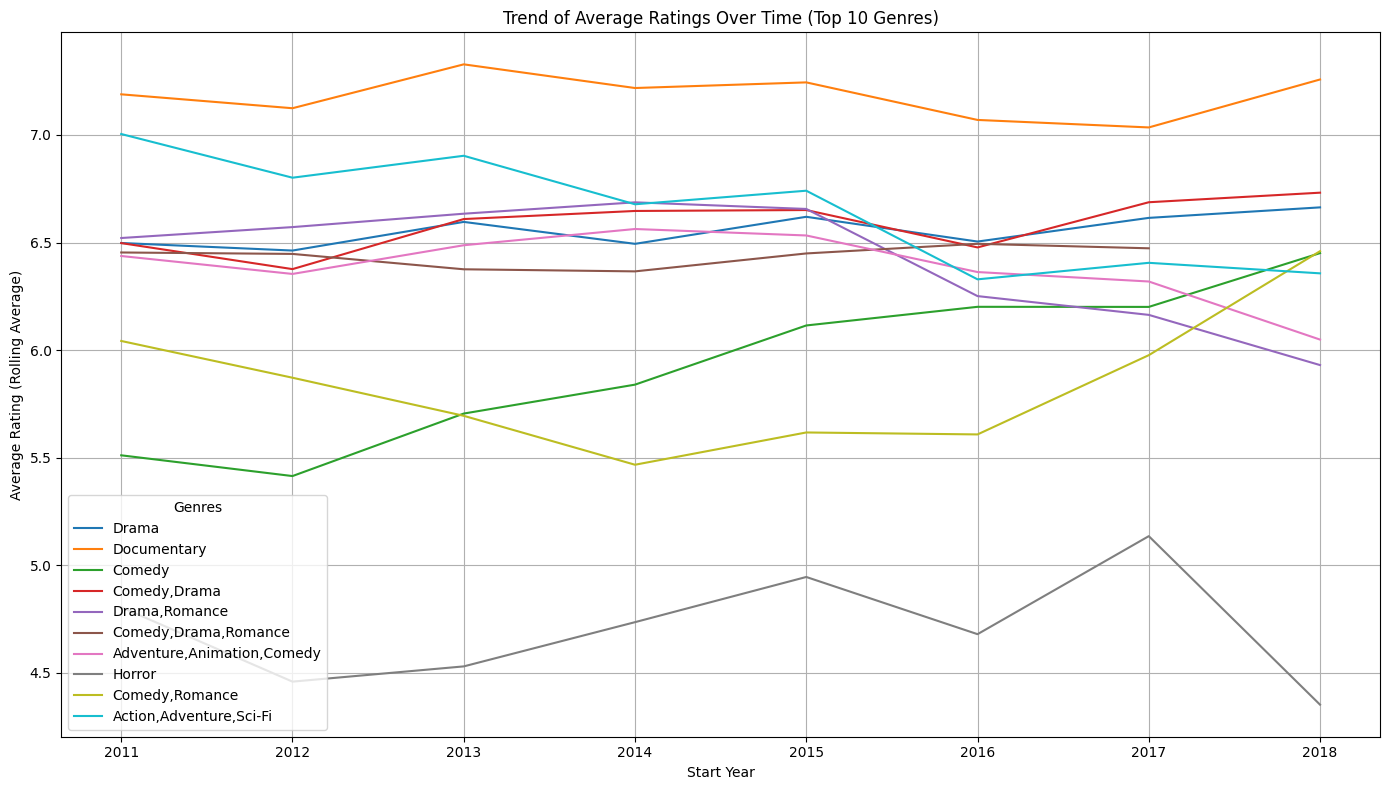

In [34]:
# Get Top 10 genres
top_genres = movies_merged['genres'].value_counts().nlargest(10).index

# Filter data to only top 10 genres
df_top_genres = movies_merged[movies_merged['genres'].isin(top_genres)].dropna(subset=['start_year', 'averagerating'])

# Group by start_year and genres to get average ratings
df_trend = df_top_genres.groupby(['start_year', 'genres'], as_index=False)['averagerating'].mean()

# Compute rolling average OUTSIDE the loop and store it as a new dataframe
df_trend['rolling_avg'] = df_trend.groupby('genres')['averagerating'].transform(lambda x: x.rolling(window=3, center=True).mean())

# Plot trend for each genre
plt.figure(figsize=(14,8))

for genre in top_genres:
    genre_data = df_trend[df_trend['genres'] == genre]
    plt.plot(genre_data['start_year'], genre_data['rolling_avg'], label=genre)

plt.title('Trend of Average Ratings Over Time (Top 10 Genres)')
plt.xlabel('Start Year')
plt.ylabel('Average Rating (Rolling Average)')
plt.legend(title='Genres')
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Result Intepretation**  
Documentary has been having the most consistent average ratings as compared to the other genres from 2011 to 2018. 
The ratings for Action, Adventure, Scifi have been gradually reducing over time. 
Drama, Romance; Comedy, Drama; and Adventure, Animation, Comedy have been having consistent ratings over time. 

### 3.3.5 🎬 Regression Analysis: Research Question  
**What drives a movie’s worldwide box office success?**  

---

### 🔍 Hypothesis  
#### **Null Hypothesis (H₀)**  
No significant relationship exists between a movie’s worldwide gross revenue and its key factors—production budget, average rating, number of votes, runtime, and release year.  

#### **Alternative Hypothesis (𝐻𝐴):** 
At least one of these factors plays a significant role in determining a movie’s worldwide box office revenue.  

---

### ✅ Assumption Testing  

Before running the regression, we need to ensure that the assumptions of linear regression hold:  

- **📈 Linearity:** The relationship between production budget and worldwide gross should be linear.  
- **📊 Normality of Residuals:** Residuals (errors) should follow a normal distribution.  
- **📏 Homoscedasticity:** Residuals should have constant variance (no clear patterns in residual plots).  
- **🔗 Independence:** Observations should be independent (no duplicate entries or autocorrelation).  

To verify these assumptions, we use scatter plots, histograms, and residual plots.  

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     620.8
Date:                Sat, 29 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:32:43   Log-Likelihood:                -59490.
No. Observations:                2935   AIC:                         1.190e+05
Df Residuals:                    2929   BIC:                         1.190e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -9.58e+09    2.6e+0

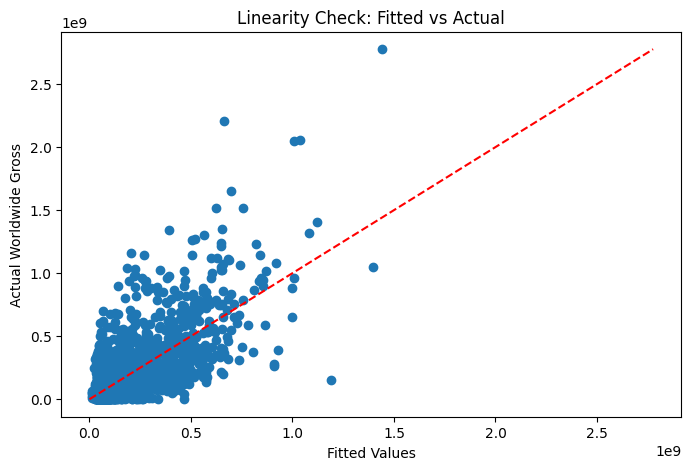

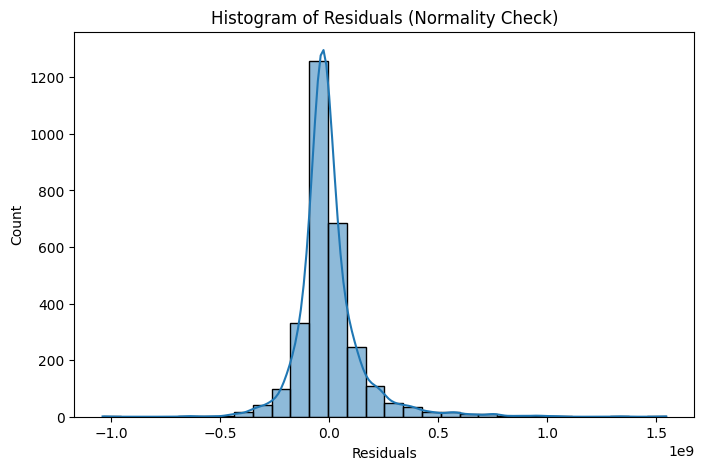

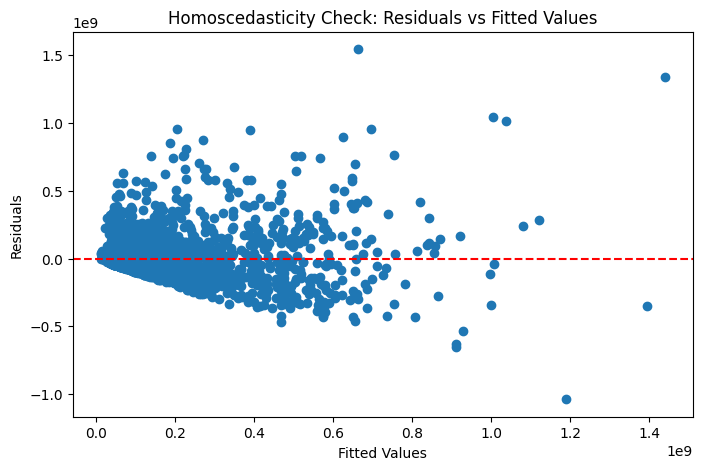

In [35]:
import statsmodels.api as sm

# Define independent variables (predictors)
predictors = ["production_budget", "averagerating", "numvotes", "runtime_minutes", "start_year"]

# Drop missing values for a clean regression model
movies_merged_clean = movies_merged.dropna(subset=["worldwide_gross"] + predictors)

# Define X and y
X = movies_merged_clean[predictors]
y = movies_merged_clean["worldwide_gross"]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Run OLS regression
model = sm.OLS(y, X).fit()

# Print results
print(model.summary())

# --- 1. Scatterplot for Linearity ---
plt.figure(figsize=(8, 5))
plt.scatter(model.fittedvalues, y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Actual Worldwide Gross')
plt.title('Linearity Check: Fitted vs Actual')
plt.show()

# --- 2. Histogram of Residuals ---
residuals = model.resid

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals (Normality Check)')
plt.show()

# --- 3. Residuals vs Fitted Values (Homoscedasticity Check) ---
plt.figure(figsize=(8, 5))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check: Residuals vs Fitted Values')
plt.show()


### Interpretation of the OLS Regression Results  

**R-squared (0.517)**: The model explains 51.7% of the variance in worldwide gross, indicating a moderate level of explanatory power. However, 48.3% of the variation remains unexplained, suggesting that other factors influence worldwide gross revenue.  

**F-statistic (627.1) & p-value (0.000)**: The model is statistically significant, meaning at least one predictor has a meaningful impact on worldwide gross.  

**Intercept (const = -13.34 billion, p = 0.000)**: If a movie had a production budget of zero, the expected worldwide gross would be approximately -13.34 billion. While unrealistic, this result indicates that other factors contribute to revenue.  

**Production Budget (coef = 3.51, p = 0.000)**: For every $1 increase in production budget, worldwide gross increases by $3.51. This strong positive relationship makes production budget the most significant predictor in the model.  

**Average Rating (coef = -2.67 million, p = 0.293)**: Not statistically significant (p > 0.05), meaning film ratings do not have a reliable impact on worldwide gross in this model.  

**Number of Votes (coef = 32.39, p = 0.179)**: Not statistically significant, suggesting that a higher number of votes does not reliably predict worldwide gross.  

**Runtime Minutes (coef = -132,000, p = 0.384)**: Not statistically significant, indicating that longer movies do not strongly influence box office success.  

**Start Year (coef = 6.62 million, p = 0.000)**: Statistically significant (p < 0.05), showing that newer movies tend to earn more, likely due to inflation and evolving market trends.  

Overall, **production budget is the strongest predictor** of worldwide gross, followed by **start year**. Meanwhile, **average rating, number of votes, and runtime minutes** do not significantly impact revenue in this model.  

To improve the model, it would be useful to check for **multicollinearity** and **normalize residuals** to enhance predictive accuracy.  

# 4️⃣ **Conclusion & Recommendations**   🎥  

## 4.1 🔍 Key Insights  

### 🎭 1. Impact of Production Budget on Revenue  
   - **💰 Bigger budgets, bigger earnings** – High-budget films consistently generate higher revenues, confirmed by **T-test and Regression analysis**.  
   - **📊 Regression model findings:**  
     - **Production budget** is the strongest predictor of box office success, explaining **51-56% of revenue variance** (**R² = 0.517**).  
     - Other factors—**marketing, star power, and distribution strategy**—likely influence revenue but were not included in the model.  

### 🎞️ 2. Profitable Genres & Market Trends  
   - **🎭 Drama** leads in **total profit ($23.74B)** due to a high number of releases.  
   - **🎬 Winning genre combinations**: *Action, Animation, Comedy* and *Adventure, Comedy, Drama* yield **high mean and median profits**.  
   - **📈 Documentaries** are a **hidden gem** – Despite fewer productions, they boast an **average profit of $89.3M**.  
   - **🎟️ Audience trends (2011–2018)**:  
     - **📊 Stable**: Documentaries continue to hold **high audience ratings**.  
     - **⬇️ Declining**: Action, Adventure, and Sci-Fi ratings **dropped over time**.  
     - **🎭 Consistent**: Drama, Romance, and Comedy maintained steady ratings.  

### 📉 3. Regression Model Insights  
   - **Significant revenue drivers:**  
     - **💵 Production Budget** (p < 0.001)  
     - **📅 Start Year** (p < 0.001)  
   - **🚫 Not statistically significant:**  
     - Average rating, number of votes, and runtime have **no strong impact** on revenue.  
   - **🔮 What this means:** Success is influenced by factors **beyond film quality**—**marketing, star power, and distribution strategy** likely play a crucial role.  

---

## 4.2 🚀 Business Recommendations  

### 🎯 1. Smart Budgeting for Maximum ROI  
   - Since **higher production budgets lead to higher earnings**, studios should **strategically allocate budgets** to **maximize impact while maintaining cost-efficiency**.  

### 🎥 2. Diversify Investments  
   - A **balanced strategy**: Invest in **big-budget blockbusters** for major revenue but **also fund high-potential mid-budget films** for optimized risk-return balance.  

### 🎬 3. Optimize Movie Runtime for Maximum Profit  
   - Studios should aim for a **runtime between 90–150 minutes**, as this range aligns with the **most profitable films**. We have seen profitability is influenced more by other factors so runtime should be optimized alongside these for the best financial outcomes.  

### 🎭 4. Genre Optimization & Market Trends  
   - Focus on **highly profitable genres** (*Action, Adventure, Comedy*).  
   - Leverage **market trends**: The **Documentary genre** shows promise despite fewer releases.  

### 🌟 5. Beyond Budget: Marketing & Star Power Matter  
   - **A big budget alone won’t guarantee success** – investing in **A-list actors** and **strong marketing campaigns** can significantly boost revenue.  

### 🕰️ 6. Timing is Everything  
   - **Strategic release timing** is key – Analyze **seasonal trends and competitive landscapes** to **maximize box office earnings**.  

### 🔬 7. Future Research & Model Refinement  
   - Enhance future predictive models by incorporating **marketing spend, cast reputation, distribution reach, and audience demographics** for **even more accurate revenue predictions**.  

📢 **Final Takeaway:** While **production budget is the biggest driver of success**, true box office dominance comes from **a mix of smart budgeting, strategic marketing, strong genre choices, and perfect release timing**. 🚀  